In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rcParams.update({'font.size': 14})

In [ ]:
file_nl = h5py.File('tmp/main2_NL.o2','r')
col_nl = file_nl['markov_chain_0']['data']
mmax_nl = np.array(col_nl['M_max'])
sn_lm_nl = np.array(col_nl['SN_LM'])
r53_nl = np.array(col_nl['R_53'])
p23_nl = np.array(col_nl['Phc_23'])
wgt_nl = np.array(col_nl['log_wgt'])
sn_ns_nl = np.array(col_nl['SN_NS'])
sn_wd_nl = np.array(col_nl['SN_WD'])

file_np = h5py.File('tmp/main2_NP.o2','r')
col_np = file_np['markov_chain_0']['data']
mmax_np = np.array(col_np['M_max'])
sn_lm_np = np.array(col_np['SN_LM'])
r53_np = np.array(col_np['R_53'])
p23_np = np.array(col_np['Phc_23'])
wgt_np = np.array(col_np['log_wgt'])
sn_ns_np = np.array(col_np['SN_NS'])
sn_wd_np = np.array(col_np['SN_WD'])

file_ml = h5py.File('tmp/main2_ML.o2','r')
col_ml = file_ml['markov_chain_0']['data']
mmax_ml = np.array(col_ml['M_max'])
sn_lm_ml = np.array(col_ml['SN_LM'])
r53_ml = np.array(col_ml['R_53'])
p23_ml = np.array(col_ml['Phc_23'])
wgt_ml = np.array(col_ml['log_wgt'])
sn_ns_ml = np.array(col_ml['SN_NS'])
sn_wd_ml = np.array(col_ml['SN_WD'])

file_mp = h5py.File('tmp/main2_MP.o2','r')
col_mp = file_mp['markov_chain_0']['data']
mmax_mp = np.array(col_mp['M_max'])
sn_lm_mp = np.array(col_nl['SN_LM'])
r53_mp = np.array(col_nl['R_53'])
p23_mp = np.array(col_nl['Phc_23'])
wgt_mp = np.array(col_nl['log_wgt'])
sn_ns_mp = np.array(col_nl['SN_NS'])
sn_wd_mp = np.array(col_nl['SN_WD'])

## Maximum Mass

In [ ]:
den_nl = stats.gaussian_kde(mmax_nl)
den_np = stats.gaussian_kde(mmax_np)
den_ml = stats.gaussian_kde(mmax_ml)
den_mp = stats.gaussian_kde(mmax_nl)
x = np.linspace(1.95, \
                np.max(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp))), \
                num=100, dtype=float)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6), dpi=600)
plt.plot(x, den_nl(x), label='NL')
plt.plot(x, den_np(x), label='NP')
plt.plot(x, den_ml(x), label='ML')
plt.plot(x, den_mp(x), label='MP')
plt.minorticks_on()
plt.tick_params('both', length=12, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xlabel('$M_\mathrm{max} \ [M_\odot]$')
plt.ylabel('$\mathcal{P} \ (M_\mathrm{max})$')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.savefig('figs/hist_mmax.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(16,12), dpi=1200)
kdeplot(mmax_nl, label='NL')
kdeplot(mmax_np, label='NP')
kdeplot(mmax_ml, label='ML')
kdeplot(mmax_mp, label='MP')
plt.xlim(np.min(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp)))-0.05, \
         np.max(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp)))+0.05)
plt.ylim(-0.25, 5.45)
plt.minorticks_on()
plt.tick_params('both', length=20, width=2, which='major')
plt.tick_params('both', length=10, width=2, which='minor')
plt.xlabel('$M_\mathrm{max} \ [M_\odot]$')
plt.ylabel('$\mathcal{P} \ (M_\mathrm{max})$')
plt.grid(which='major', linewidth=0.4, visible=True)
plt.grid(which='minor', linewidth=0.2, visible=True)
plt.legend()
plt.savefig('figs/kde_mmax.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()

## Correlation Test: Output Quantities

In [ ]:
file_ml= h5py.File('tmp/esmr_ML.o2','r')
list(file_ml.keys())
prob_ml = file_ml['ed_pr_3d']['data']['prob']

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,20))
ax[0,0].scatter(r53_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(p23_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(mmax_nl, sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(r53_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(p23_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(mmax_np, sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(r53_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(p23_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(mmax_ml, sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(r53_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(p23_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(mmax_mp, sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
ax[3,0].set_xlabel('$R_{1.7M_\odot}$ [km]')
ax[3,1].set_xlabel('$P~(\epsilon \simeq 500)$ [MeV/fm$^3]$')
ax[3,2].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
for i in range(4):
    for j in range(3):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j%3==0:
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.7 M_\odot$)')
fig.savefig('figs/scat_lmxb.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(22,30))
ax[0,0].scatter(sn_lm_nl, sn_ns_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(sn_lm_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(sn_ns_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(sn_lm_np, sn_ns_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(sn_lm_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(sn_ns_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(sn_lm_ml, sn_ns_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(sn_lm_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(sn_ns_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(sn_lm_mp, sn_ns_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(sn_lm_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(sn_ns_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
for i in range(4):
    for j in range(3):
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j==0:
            ax[i,j].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+1].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j+1].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
            ax[i,j+2].set_xlabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+2].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
fig.savefig('figs/scat_lmxb2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
rate_perc=np.zeros((4,12))
model=['ml','mp','nl','np']
for j, mod in enumerate(model):
  for i in range(4,16):
    if (i<10):
      file=h5py.File('run0'+str(i)+'/'+model[j]+'_out','r')
    else:
      file=h5py.File('run'+str(i)+'/'+model[j]+'_out','r')
    n_accept=np.array(file['n_accept'])
    n_reject=np.array(file['n_reject'])
    avg_rate=np.average(n_accept/(n_accept+n_reject))
    rate_perc[j,i-4]=avg_rate*100

In [ ]:
runs=np.arange(4,16)
plt.plot(runs,rate_perc[0], label='mlines')
plt.plot(runs,rate_perc[1], label='mpoly')
plt.plot(runs,rate_perc[2], label='nlines')
plt.plot(runs,rate_perc[3], label='npoly')
plt.xlabel("Run #")
plt.ylabel("Avg. Acceptance Rate (%)")
plt.title("Runs on PSC Bridges-2")
plt.grid()
plt.legend()
plt.savefig("acp_rate.png")
plt.show()

In [ ]:
file = h5py.File('np_43_tmp','r')
col = file['markov_chain_0']['data']
r43 = np.array(col['R_43'])
lambda43 = np.array(col['Lambda_bar_43'])
diff = []
for i in range(len(r43)-1):
    for j in range(len(r43)-1):
        if i!=j and r43[i]!=r43[j]:
            val = (lambda43[i]-lambda43[j])/(r43[i]-r43[j])
            diff.append(val)
            if abs(val) >= 5.0e8:
                print(i,j)
diff = np.array(diff)
plt.figure(figsize=(8,6))
plt.scatter(np.arange(len(diff)), diff, s=1, marker='o')
plt.xlabel('Pair of Rows')
plt.ylabel('$\Delta \Lambda_{43} / \Delta R_{43}$')
plt.show()

# KDE Plots

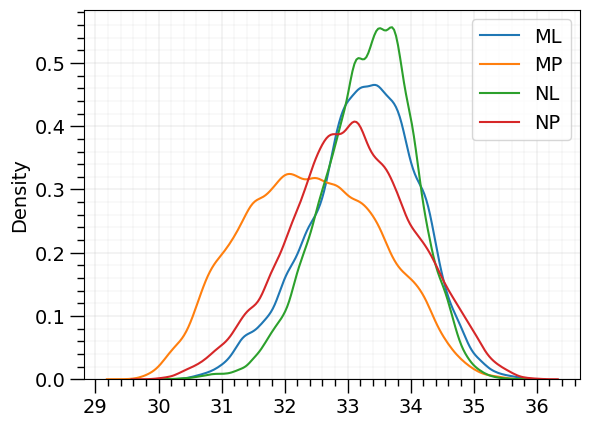

In [4]:
a_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_S'])
a_mp = np.array(h5py.File('mp_51','r')['markov_chain_0']['data']['param_S'])
a_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_S'])
a_np = np.array(h5py.File('np_50','r')['markov_chain_0']['data']['param_S'])
sns.kdeplot(a_ml, label='ML')
sns.kdeplot(a_mp, label='MP')
sns.kdeplot(a_nl, label='NL')
sns.kdeplot(a_np, label='NP')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()


In [ ]:
mmax_nl  = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['R_53'])
p23_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_np  = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['R_53'])
p23_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_ml  = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['R_53'])
p23_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_mp  = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_nl = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_nl   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['R_53'])
p23_nl   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_nl   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_nl = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_nl = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_WD'])

In [ ]:
csq1_ml   = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq1'])
csq2_ml   = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq2'])
csq3_ml   = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq3'])
trans1_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['trans1'])
trans2_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['trans2'])
a_ml      = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['a'])
alpha_ml  = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['alpha'])
S_ml      = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_S'])
L_ml      = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_L'])
mchirp_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['M_chirp_det'])
q_ml      = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['q'])
z_cdf_ml  = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['z_cdf'])

L_min_ml = 9.17*S_ml-266.0
L_max_ml = 14.3*S_ml-379.0
b_ml     = S_ml-16.0-a_ml
beta_ml  = (L_ml/3.0-a_ml*alpha_ml)/b_ml

mmax_ml    = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['M_max'])
dpdm_ml    = np.log(np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['dpdM']))
log_wgt_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['log_wgt'])

csq1_nl    = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq1'])
csq2_nl    = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq2'])
csq3_nl    = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq3'])
trans1_nl  = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['trans1'])
trans2_nl  = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['trans2'])
a_nl       = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['a'])
alpha_nl   = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['alpha'])
S_nl       = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_S'])
L_nl       = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_L']) 
mchirp_nl  = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['M_chirp_det']) 
q_nl       = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['q'])
z_cdf_nl   = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['z_cdf'])

L_min_nl = 9.17*S_nl-266.0
L_max_nl = 14.3*S_nl-379.0
b_nl     = S_nl-16.0-a_nl
beta_nl  = (L_nl/3.0-a_nl*alpha_nl)/b_nl

mmax_nl    = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['M_max'])
dpdm_nl    = np.log(np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['dpdM']))
log_wgt_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['log_wgt'])

### 1D Plots

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))
sns.kdeplot(csq3_ml, ax=ax[0],  label='ML')
sns.kdeplot(csq3_nl, ax=ax[0],  label='NL')
sns.kdeplot(mmax_ml, ax=ax[1], label='ML')
sns.kdeplot(mmax_nl, ax=ax[1], label='NL')
sns.kdeplot(dpdm_ml, ax=ax[2], label='ML', log_scale=True)
sns.kdeplot(dpdm_nl, ax=ax[2], label='NL', log_scale=True)
for i in range(3):
    ax[i].minorticks_on()
    ax[i].tick_params('both', which='major', length=10, width=1.0)
    ax[i].tick_params('both', which='minor', length=5,  width=0.5)
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)
    ax[i].yaxis.set_visible(False)
    ax[i].legend()
ax[0].set_xlabel('$c_{s,3}^2$')
ax[1].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[2].set_xlabel('$dp/dM$')

In [ ]:
#a_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_S'])
#a_mp = np.array(h5py.File('mp_51','r')['markov_chain_0']['data']['param_S'])
#a_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_S'])
#a_np = np.array(h5py.File('np_50','r')['markov_chain_0']['data']['param_S'])
#sns.kdeplot(a_ml, label='ML')
#sns.kdeplot(a_nl, label='NL')
#sns.kdeplot(a_mp, label='MP')
#sns.kdeplot(a_np, label='NP')
#plt.minorticks_on()
#plt.tick_params('both', length=10, width=1, which='major')
#plt.tick_params('both', length=5, width=1, which='minor')
#plt.grid(which='major', linewidth=0.2, visible=True)
#plt.grid(which='minor', linewidth=0.1, visible=True)
#plt.legend()
#plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
sns.kdeplot(csq1_ml, ax=ax[0,0], label='csq1')
sns.kdeplot(csq2_ml, ax=ax[0,0], label='csq2')
sns.kdeplot(csq3_ml, ax=ax[0,0], label='csq3')
sns.kdeplot(csq1_nl, ax=ax[1,0], label='csq1')
sns.kdeplot(csq2_nl, ax=ax[1,0], label='csq2')
sns.kdeplot(csq3_nl, ax=ax[1,0], label='csq3')
sns.kdeplot(trans1_ml, ax=ax[0,1], label='trans1')
sns.kdeplot(trans2_ml, ax=ax[0,1], label='trans2')
sns.kdeplot(trans1_nl, ax=ax[1,1], label='trans1')
sns.kdeplot(trans2_nl, ax=ax[1,1], label='trans2')
for i in range(2):
    for j in range(2):
        if i==0:
            ax[i,j].set_title('ML')
        else:
            ax[i,j].set_title('NL')
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', which='major', length=10, width=1.0)
        ax[i,j].tick_params('both', which='minor', length=5,  width=0.5)
        ax[i,j].grid(which='major', linewidth=0.2, visible=True)
        ax[i,j].grid(which='minor', linewidth=0.1, visible=True)
        ax[i,j].yaxis.set_visible(False)
        ax[i,j].legend()

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
ax[0,0].set_title('a')
ax[0,1].set_title('alpha')
ax[1,0].set_title('S')
ax[1,1].set_title('L')
ax[0,2].set_title('b')
ax[0,3].set_title('beta')
ax[1,2].set_title('L_min')
ax[1,3].set_title('L_max')

sns.kdeplot(a_ml, ax=ax[0,0], label='ML')
sns.kdeplot(a_nl, ax=ax[0,0], label='NL')
sns.kdeplot(alpha_ml, ax=ax[0,1], label='ML')
sns.kdeplot(alpha_nl, ax=ax[0,1], label='NL')
sns.kdeplot(b_ml, ax=ax[0,2], label='ML')
sns.kdeplot(b_nl, ax=ax[0,2], label='NL')
sns.kdeplot(beta_ml, ax=ax[0,3], label='ML')
sns.kdeplot(beta_nl, ax=ax[0,3], label='NL')
sns.kdeplot(S_ml, ax=ax[1,0], label='ML')
sns.kdeplot(S_nl, ax=ax[1,0], label='NL')
sns.kdeplot(L_ml, ax=ax[1,1], label='ML')
sns.kdeplot(L_nl, ax=ax[1,1], label='NL')
sns.kdeplot(L_min_ml, ax=ax[1,2], label='ML')
sns.kdeplot(L_min_nl, ax=ax[1,2], label='NL')
sns.kdeplot(L_max_ml, ax=ax[1,3], label='ML')
sns.kdeplot(L_max_nl, ax=ax[1,3], label='NL')

for i in range(2):
    for j in range(4):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', which='major', length=10, width=1.0)
        ax[i,j].tick_params('both', which='minor', length=5,  width=0.5)
        ax[i,j].grid(which='major', linewidth=0.2, visible=True)
        ax[i,j].grid(which='minor', linewidth=0.1, visible=True)
        ax[i,j].yaxis.set_visible(False)
        ax[i,j].legend()


In [ ]:
dpdm_ml1  = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['dpdM'])
csq3_ml1  = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq3'])
mmax2_ml1 = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['M_max2'])
mmax1_ml1 = mmax2_ml1 - (dpdm_ml1/(csq3_ml1*1.01-csq3_ml1))**(-1)
mmax2_ml2 = np.array(h5py.File('ml_60','r')['markov_chain_0']['data']['M_max2'])
mmax1_ml2 = np.array(h5py.File('ml_60','r')['markov_chain_0']['data']['M_max'])
dm_ml1 = mmax2_ml1 - mmax1_ml1
dm_ml2 = mmax2_ml2 - mmax1_ml2

sns.kdeplot(dm_ml1, log_scale=True, label='ML_59')
sns.kdeplot(dm_ml2, log_scale=True, label='ML_60')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5,  width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.xlabel('$\Delta M_\mathrm{max}~[M_\odot]$')
plt.legend()
plt.show()

In [ ]:
sns.kdeplot(mmax1_ml1, label='ML_59')
sns.kdeplot(mmax1_ml2, label='ML_60')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5,  width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.xlabel('$M_\mathrm{max}~[M_\odot]$')
plt.legend()
plt.show()

### 2D Plots

In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(12,6))
log_dm_ml = np.log((dpdm_ml/(csq3_ml*1.01-csq3_ml))**(-1))
log_dm_nl = np.log((dpdm_nl/(csq3_nl*1.01-csq3_nl))**(-1))
sns.kdeplot(x=log_dm_ml, y=mmax_ml,    ax=ax[0], cmap='coolwarm', fill=True, levels=40)
sns.kdeplot(x=log_dm_ml, y=log_wgt_ml, ax=ax[1], cmap='coolwarm', fill=True, levels=40)
ax[0].set_xlabel('$\log \Delta M_\mathrm{max}$')
ax[0].set_ylabel('$M_\mathrm{max}~[M_\odot]$')
ax[1].set_xlabel('$\log \Delta M_\mathrm{max}$')
ax[1].set_ylabel('$\log \mathcal{L}$')
for i in range(2):
    ax[i].set_title('ML')
ax[0].set_xlim(-11.1, -4.0)
ax[0].set_ylim(1.97, 2.6)
ax[1].set_xlim(-11.0, -3.9)
ax[1].set_ylim(-10.0, 45.0)
fig.savefig('figs/dm_ml.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(x=mmax_ml, y=log_wgt_ml, ax=ax[0], cmap='coolwarm', fill=True, levels=40)
sns.kdeplot(x=mmax_nl, y=log_wgt_nl, ax=ax[1], cmap='coolwarm', fill=True, levels=40)
ax[0].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[0].set_ylabel('$\log \mathcal{L}$')
ax[1].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[1].set_ylabel('$\log \mathcal{L}$')
ax[0].set_title('ML')
ax[1].set_title('NL')
ax[0].set_xlim(1.97, 2.6)
ax[0].set_ylim(-10.0, 45.0)
ax[1].set_xlim(1.97, 2.5)
ax[1].set_ylim(-15.0, 27.0)
plt.show()

In [ ]:
mmax1_ml = np.array(h5py.File('ml_31','r')['markov_chain_0']['data']['M_max'])
mmax2_ml = np.array(h5py.File('ml_35','r')['markov_chain_0']['data']['M_max'])
mmax3_ml = np.array(h5py.File('ml_40','r')['markov_chain_0']['data']['M_max'])
mmax4_ml = np.array(h5py.File('ml_45','r')['markov_chain_0']['data']['M_max'])
mmax5_ml = np.array(h5py.File('ml_50','r')['markov_chain_0']['data']['M_max'])
mmax6_ml = np.array(h5py.File('ml_55','r')['markov_chain_0']['data']['M_max'])
mmax7_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['M_max'])
plt.figure(figsize=(8,6))
sns.kdeplot(mmax1_ml, label='31')
#sns.kdeplot(mmax2_ml, label='35')
sns.kdeplot(mmax3_ml, label='40')
#sns.kdeplot(mmax4_ml, label='45')
sns.kdeplot(mmax5_ml, label='50')
#sns.kdeplot(mmax6_ml, label='55')
sns.kdeplot(mmax7_ml, label='59')
plt.title('ML')
plt.xlabel('$M_\mathrm{max}~[M_\odot]$')
plt.ylabel('Density')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(x=mmax_ml, y=log_dm_ml, ax=ax[0], cmap='coolwarm', fill=True, levels=40)
sns.kdeplot(x=mmax_nl, y=log_dm_nl, ax=ax[1], cmap='coolwarm', fill=True, levels=40)
ax[0].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[0].set_ylabel('$\log \Delta M_\mathrm{max}$')
ax[1].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[1].set_ylabel('$\log \Delta M_\mathrm{max}$')
ax[0].set_title('ML')
ax[1].set_title('NL')
ax[0].set_xlim(1.97, 2.6)
ax[0].set_ylim(-11.1, -4.0)
ax[1].set_xlim(1.97, 2.6)
ax[1].set_ylim(-11.0, -3.9)
plt.show()

In [ ]:
mmax2_ml = (dpdm_ml/(csq3_ml*1.01-csq3_ml))**(-1)+mmax_ml
mmax2_nl = (dpdm_nl/(csq3_nl*1.01-csq3_nl))**(-1)+mmax_nl
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(mmax_ml, ax=ax[0], label='M_max')
sns.kdeplot(mmax2_ml, ax=ax[0], label='M_max2')
sns.kdeplot(mmax_nl, ax=ax[1], label='M_max')
sns.kdeplot(mmax2_nl, ax=ax[1], label='M_max2')
ax[0].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[1].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[0].set_ylabel('Density')
for i in range(2):
    ax[i].minorticks_on()
    ax[i].tick_params('both', which='major', length=10, width=1.0)
    ax[i].tick_params('both', which='minor', length=5,  width=0.5)
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)
    ax[i].legend()
ax[0].set_xlim(1.95, 3.0)
ax[1].set_xlim(1.8, 3.0)
ax[0].set_title('ML')
ax[1].set_title('NL')
fig.savefig('figs/mmax2.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(x=mmax_ml, y=log_wgt_ml, ax=ax[0], cmap='coolwarm', fill=True, levels=40)
sns.kdeplot(x=mmax_nl, y=log_wgt_nl, ax=ax[1], cmap='coolwarm', fill=True, levels=40)
ax[0].set_title('ML')
ax[1].set_title('NL')
ax[0].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[1].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
ax[0].set_ylabel('$\log \mathcal{L}$')
ax[0].set_xlim(1.95, 2.6)
ax[1].set_xlim(1.95, 2.5)
ax[0].set_ylim(-8, 43.0)
ax[1].set_ylim(-15.0, 27.0)
plt.show()

In [ ]:
mmax1_ml = np.array(h5py.File('ml_31','r')['markov_chain_0']['data']['M_max'])
mmax2_ml = np.array(h5py.File('ml_35','r')['markov_chain_0']['data']['M_max'])
mmax3_ml = np.array(h5py.File('ml_40','r')['markov_chain_0']['data']['M_max'])
mmax4_ml = np.array(h5py.File('ml_45','r')['markov_chain_0']['data']['M_max'])
mmax5_ml = np.array(h5py.File('ml_50','r')['markov_chain_0']['data']['M_max'])
mmax6_ml = np.array(h5py.File('ml_55','r')['markov_chain_0']['data']['M_max'])
mmax7_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['M_max'])
plt.figure(figsize=(8,6))
sns.kdeplot(mmax1_ml, label='31')
#sns.kdeplot(mmax2_ml, label='35')
sns.kdeplot(mmax3_ml, label='40')
#sns.kdeplot(mmax4_ml, label='45')
sns.kdeplot(mmax5_ml, label='50')
#sns.kdeplot(mmax6_ml, label='55')
sns.kdeplot(mmax7_ml, label='59')
plt.title('ML')
plt.xlabel('$M_\mathrm{max}~[M_\odot]$')
plt.ylabel('Density')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=mmax_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(12.35, 13.0)
ax[0].set_ylim(2.02, 2.3)
ax[0].set_xlabel('a')
ax[0].set_ylabel('M_max')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=mmax_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(12.43, 12.72)
ax[1].set_ylim(2.015, 2.115)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=dpdm_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(12.35, 13.0)
ax[0].set_ylim(11.0, 34.0)
ax[0].set_xlabel('a')
ax[0].set_ylabel('$\log(dp/dM)$')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=dpdm_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(12.43, 12.72)
ax[1].set_ylim(3.0, 4.3)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=mmax_ml, y=dpdm_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(2.02, 2.3)
#ax[0].set_ylim(11.0, 34.0)
ax[0].set_xlabel('M_max')
ax[0].set_ylabel('$\log(dp/dM)$')
ax[0].set_title('ML')
sns.kdeplot(x=mmax_nl, y=dpdm_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(2.015, 2.115)
#ax[1].set_ylim(3.0, 4.3)
ax[1].set_xlabel('M_max')
ax[1].set_title('NL')



In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=csq3_ml, y=mmax_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(2.02, 2.3)
ax[0].set_xlabel('csq3')
ax[0].set_ylabel('M_max')
ax[0].set_title('ML')
sns.kdeplot(x=csq3_nl, y=mmax_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(0.4, 0.67)
ax[1].set_ylim(2.015, 2.115)
ax[1].set_xlabel('csq3')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=csq3_ml, y=dpdm_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(11.0, 34.0)
ax[0].set_xlabel('csq3')
ax[0].set_ylabel('$\log(dp/dM)$')
ax[0].set_title('ML')
sns.kdeplot(x=csq3_nl, y=dpdm_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(0.4, 0.7)
ax[1].set_ylim(3.0, 4.26)
ax[1].set_xlabel('csq3')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=csq3_ml, y=a_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(12.35, 13.0)
ax[0].set_xlabel('csq3')
ax[0].set_ylabel('a')
ax[0].set_title('ML')
sns.kdeplot(x=csq3_nl, y=a_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(0.4, 0.7)
ax[1].set_ylim(12.43, 12.72)
ax[1].set_xlabel('csq3')
ax[1].set_title('NL')
plt.show()

#### EoS Parameters

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=alpha_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(0.0, 0.3)
ax[0].set_xlabel('a')
ax[0].set_ylabel('alpha')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=alpha_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(0.0, 0.3)
ax[1].set_xlabel('a')
ax[1].set_title('NL')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=b_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(12.35, 13.0)
ax[0].set_ylim(3.5, 6.0)
ax[0].set_xlabel('a')
ax[0].set_ylabel('b')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=b_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(12.43, 12.72)
ax[1].set_ylim(3.0, 4.3)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=beta_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(12.4, 13.0)
ax[0].set_ylim(1.55, 2.2)
ax[0].set_xlabel('a')
ax[0].set_ylabel('beta')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=beta_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(12.42, 12.72)
ax[1].set_ylim(1.5, 2.2)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=S_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('a')
ax[0].set_ylabel('S')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=S_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=a_ml, y=L_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('a')
ax[0].set_ylabel('L')
ax[0].set_title('ML')
sns.kdeplot(x=a_nl, y=L_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('a')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=alpha_ml, y=b_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('b')
ax[0].set_title('ML')
sns.kdeplot(x=alpha_nl, y=b_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('alpha')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=alpha_ml, y=beta_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
ax[0].set_ylim(1.5, 2.2)
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('beta')
ax[0].set_title('ML')
sns.kdeplot(x=alpha_nl, y=beta_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
ax[1].set_xlim(0.47, 0.485)
ax[1].set_ylim(1.5, 2.2)
ax[1].set_xlabel('alpha')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=alpha_ml, y=S_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('S')
ax[0].set_title('ML')
sns.kdeplot(x=alpha_nl, y=S_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('alpha')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=alpha_ml, y=L_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('L')
ax[0].set_title('ML')
sns.kdeplot(x=alpha_nl, y=L_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('alpha')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=b_ml, y=beta_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('b')
ax[0].set_ylabel('beta')
ax[0].set_title('ML')
sns.kdeplot(x=b_nl, y=beta_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('b')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=b_ml, y=S_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('b')
ax[0].set_ylabel('S')
ax[0].set_title('ML')
sns.kdeplot(x=b_nl, y=S_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('b')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=b_ml, y=L_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('b')
ax[0].set_ylabel('L')
ax[0].set_title('ML')
sns.kdeplot(x=b_nl, y=L_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('b')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=beta_ml, y=S_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('beta')
ax[0].set_ylabel('S')
ax[0].set_title('ML')
sns.kdeplot(x=beta_nl, y=S_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('beta')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=beta_ml, y=L_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
ax[0].set_xlim(1.5, 2.3)
ax[0].set_ylim(40.0, 53.0)
ax[0].set_xlabel('beta')
ax[0].set_ylabel('L')
ax[0].set_title('ML')
sns.kdeplot(x=beta_nl, y=L_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('beta')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=S_ml, y=L_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
#ax[0].set_xlim(12.35, 13.0)
#ax[0].set_ylim(15.0, 17.0)
ax[0].set_xlabel('S')
ax[0].set_ylabel('L')
ax[0].set_title('ML')
sns.kdeplot(x=S_nl, y=L_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)
#ax[1].set_xlim(12.43, 12.72)
#ax[1].set_ylim(15.0, 17.0)
ax[1].set_xlabel('S')
ax[1].set_title('NL')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=csq3_ml, y=trans1_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
sns.kdeplot(x=csq3_nl, y=trans1_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=trans1_ml, y=trans2_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
sns.kdeplot(x=trans1_nl, y=trans2_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x=csq3_ml, y=trans2_ml, ax=ax[0], weights=np.exp(log_wgt_ml), cmap='coolwarm', fill=True)
sns.kdeplot(x=csq3_nl, y=trans2_nl, ax=ax[1], weights=np.exp(log_wgt_nl), cmap='coolwarm', fill=True)


## ML: Mass Distributions

In [ ]:
mchain  = h5py.File('tmp/dist_ML.o2','r')['gm_sn']
mchain2 = h5py.File('tmp/main_ML.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, weights=mult, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, weights=mult, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, weights=mult, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

sn_ns_avg.shape

In [ ]:
nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

In [ ]:
def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('tmp/main2_ML.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

In [ ]:
delta_ns = skewness_ns_avg/np.sqrt(1.0+skewness_ns_avg**2)
delta_wd = skewness_wd_avg/np.sqrt(1.0+skewness_wd_avg**2)
delta_lm = skewness_lm_avg/np.sqrt(1.0+skewness_lm_avg**2)

ns_mean = mean_ns_avg+width_ns_avg*delta_ns*np.sqrt(2.0/np.pi)
wd_mean = mean_wd_avg+width_wd_avg*delta_wd*np.sqrt(2.0/np.pi)
lm_mean = mean_lm_avg+width_lm_avg*delta_lm*np.sqrt(2.0/np.pi)

ns_std = width_ns_avg*np.sqrt(1.0-2.0*delta_ns**2/np.pi)
wd_std = width_wd_avg*np.sqrt(1.0-2.0*delta_wd**2/np.pi)
lm_std = width_lm_avg*np.sqrt(1.0-2.0*delta_lm**2/np.pi)
#ns_std2 = ns_std
#wd_std2 = wd_std
#lm_std2 = lm_std
#for i in range(len(ns_mean)):
#    if ns_mean[i]-ns_std[i] < 0.0:
#        ns_std2[i] = ns_mean[i]
#    if wd_mean[i]-wd_std[i] < 0.0:
#        wd_std2[i] = wd_mean[i]
#    if lm_mean[i]-lm_std[i] < 0.0:
#        lm_std2[i] = lm_mean[i]

ns_skew = ((4.0-np.pi)/2.0) * (delta_ns*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_ns**2/np.pi)**1.5
wd_skew = ((4.0-np.pi)/2.0) * (delta_wd*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_wd**2/np.pi)**1.5
lm_skew = ((4.0-np.pi)/2.0) * (delta_lm*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_lm**2/np.pi)**1.5

print(ns_mean, ns_std, ns_skew)
print(wd_mean, wd_std, wd_skew)
print(lm_mean, lm_std, lm_skew)


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
#ax[0].plot(gm, sn.pdf(gm, loc=ns_mean, scale=ns_std, a=ns_skew), linewidth=0.6, color='red')
ax[0].plot(gm, sn.pdf(gm, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg), linewidth=0.6, color='blue')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
#ax[1].plot(gm, sn.pdf(gm, loc=wd_mean, scale=wd_std, a=wd_skew), linewidth=0.6, color='red')
ax[1].plot(gm, sn.pdf(gm, loc=mean_wd_avg, scale=width_wd_avg, a=skewness_wd_avg), linewidth=0.6, color='blue')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
#ax[2].plot(gm, sn.pdf(gm, loc=lm_mean, scale=lm_std, a=lm_skew), linewidth=0.6, color='red')
ax[2].plot(gm, sn.pdf(gm, loc=mean_lm_avg, scale=width_lm_avg, a=skewness_lm_avg), linewidth=0.6, color='blue')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_o$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')
fig.suptitle('ML')

Suppose NS mass $M \in [0.2, 3.0]~M_\odot$ has a grid of 100 intervals. Denote each mass value by $M_i$. Then compute $SN_i=SN(M_i, \mu, \sigma, \alpha)$ and average$(SN_i)$

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn.pdf(gm, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg), linewidth=0.6, color='blue')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn.pdf(gm, loc=mean_wd_avg, scale=width_wd_avg, a=skewness_wd_avg), linewidth=0.6, color='blue')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn.pdf(gm, loc=mean_lm_avg, scale=width_lm_avg, a=skewness_lm_avg), linewidth=0.6, color='blue')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_ns, scale=width_ns, a=skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_ns, scale=width_ns, a=skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_wd, scale=width_wd, a=skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_lm, scale=width_lm, a=skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_lm, scale=width_lm, a=skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_o$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')
fig.suptitle('ML')

In [ ]:
sn.interval(0.68, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg)

In [ ]:
x = np.array(h5py.File('tmp/dist_ML.o2','r')['sn_ns/xval'])
y = np.array(h5py.File('tmp/dist_ML.o2','r')['sn_ns/yval'])
z = np.array(h5py.File('tmp/dist_ML.o2','r')['sn_ns/data/prob_ns']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.show()

## MP: Mass Distribution

In [ ]:
mchain  = h5py.File('tmp/dist_MP.o2','r')['gm_sn']
mchain2 = h5py.File('tmp/main_MP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('tmp/main2_MP.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

## NL: Mass Distribution

In [ ]:
mchain  = h5py.File('tmp/dist_NL.o2','r')['gm_sn']
mchain2 = h5py.File('tmp/main_NL.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('tmp/main2_NL.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

## NP: Mass Distributions

In [ ]:
mchain  = h5py.File('tmp/dist_NP.o2','r')['gm_sn']
mchain2 = h5py.File('tmp/main_NP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('tmp/main2_NP.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].text(0.1, 0.9, '$\mu$', fontsize=12, color='black', transform=ax[2].transAxes)
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

# Mass Distributions

In [ ]:
model = ['ML', 'MP', 'NL', 'NP']

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

fig, ax = plt.subplots(4, 3, figsize=(21,18))

for i in range(4):
    mchain  = h5py.File(f'tmp/dist_{model[i]}.o2','r')['gm_sn']
    mchain2 = h5py.File(f'tmp/main_{model[i]}.o2','r')['markov_chain_0/data']
    mchain3 = h5py.File(f'tmp/main2_{model[i]}.o2','r')['markov_chain_0/data']
    mult = np.array(mchain2['mult'])
    mmax = np.array(mchain2['M_max'])
    gm = np.linspace(0.0, 3.0, 100, dtype=float)
    sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
    sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
    sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

    sn_ns_avg = np.average(sn_ns, axis=0)
    sn_ns_std = np.std(sn_ns, axis=0)
    sn_wd_avg = np.average(sn_wd, axis=0)
    sn_wd_std = np.std(sn_wd, axis=0)
    sn_lm_avg = np.average(sn_lm, axis=0)
    sn_lm_std = np.std(sn_lm, axis=0)

    sn_ns_std2 = sn_ns_std
    sn_wd_std2 = sn_wd_std
    sn_lm_std2 = sn_lm_std

    for j in range(len(sn_ns_avg)):
        if sn_ns_avg[j]-sn_ns_std[j] < 0.0:
            sn_ns_std2[j] = sn_ns_avg[j]
        if sn_wd_avg[j]-sn_wd_std[j] < 0.0:
            sn_wd_std2[j] = sn_wd_avg[j]
        if sn_lm_avg[j]-sn_lm_std[j] < 0.0:
            sn_lm_std2[j] = sn_lm_avg[j]

    

mchain  = h5py.File('tmp/dist_NP.o2','r')['gm_sn']
mchain2 = h5py.File('tmp/main_NP.o2','r')['markov_chain_0/data']
mchain3 = h5py.File('tmp/main2_NP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('tmp/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].text(0.1, 0.9, '$\mu$', fontsize=12, color='black', transform=ax[2].transAxes)
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')